## Historical Prices of Cryptocurrency
Ashwin Jeyaseelan, Evan Kerekanich

### Introduction
Recently, a cryptocurrency called bitcoin has become a hot topic, but what is it? Bitcoin is the first digital currency which allows the transfer of currency between people without a third party. It was created in 2009 by an unknown person with the alias, Satoshi Nakamoto. It can be used to buy merchandice just like normal currency. Surprisingly, bitcoin has built up a large enough community that markets run competitions where participants are rewarded with bitcoins in exchange of solving complex math puzzles. 

The purpose of this tutorial is to understand the trend of bitcoin prices to help users decide if it's worth participating with. We will show how to gather, parse, analyze, and conduct hypothesis testing on the data. Finally, we will use machine learning to provide analysis about the bitcoin prices. Our goal is to see if Bitcoin prices can be predicted and attempt to do so.

### Getting Started 
We have included a zip file of our data set in the repository, please unzip it and place it into your current directory, a link for the data is included in the further reading. Next we will load the bitcoin data file with the library, Pandas. This data contains information about 1-minute bitcoin exchanges from Jan 2012 to October 2017. 

#### Required Tools:
* Python 3.5+
* Pandas
* numpy 
* matplotlib 
* Statsmodels.api
* torch


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from datetime import datetime
import statsmodels.api as sm
from itertools import product

In [34]:
# Load data:
table = pd.read_csv("bitcoin-historical-data/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv")
# Print the first 5 rows of our data:
table.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325292180,4.247,4.247,4.247,4.247,0.4,1.6988,4.247
1,1325292240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325292300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325292360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325292420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at our data, we can see the features: Timestamp (unix time), open (opening or starting price of the bitcoin), high (highest price in the minute), low (lowest price in the minute), close (the closing price of the bitcoin), volume and the weighted price. The unix time may not be reader friendly, but for now it is acceptable.

#### Tidying Our Data
In the head of the table, notice that only one of the rows has succificent data to properly analyze the features. We can save space and time by getting rid of rows that are missing data for features.

In [2]:
# drop rows with NaN for any of their features
table = table.dropna()
# view the first 5 rows of the tidy table:
table.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325292180,4.247,4.247,4.247,4.247,0.400000,1.698800,4.247000
138,1325300460,4.100,4.100,4.100,4.100,0.623628,2.556875,4.100000
212,1325304900,4.100,4.100,4.100,4.100,6.503072,26.662595,4.100000
284,1325309220,4.045,4.045,4.044,4.044,2.379300,9.624254,4.044994
311,1325310840,4.044,4.044,4.011,4.011,0.896400,3.607223,4.024122


### Data Analysis
Now that we've prepared our data, we can analyze it. Let's prepare plots to view the prices by days, months, and years.


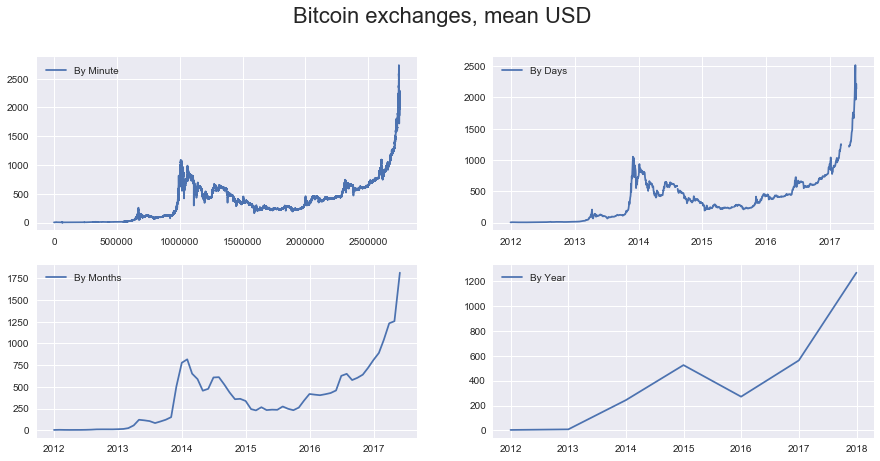

In [3]:
fig = plt.figure(figsize=[15,7])
plt.suptitle('Mean Bitcoin Exchanges, USD', fontsize=22)

# minute plot:
plt.subplot(221)
plt.plot(table.Weighted_Price, label='Minute')
plt.legend()

table.Timestamp = pd.to_datetime(table.Timestamp, unit='s')
table.index = table.Timestamp

# Day plot:
table_day = table.resample('D').mean()
plt.subplot(222)
plt.plot(table_day.Weighted_Price, label='Daily')
plt.legend()

# month plot:
plt.subplot(223)
table_month = table.resample('M').mean()
plt.plot(table_month.Weighted_Price, label='Monthly')
plt.legend()

# year plot:
plt.subplot(224)
table_year = table.resample('A-DEC').mean()
plt.plot(table_year.Weighted_Price, label='Yearly')
plt.legend()

plt.show()

From looking at the data, we can see that that the price has its first peak around 2015, and rapidly increases after 2016. In the day minute plot, you can see more oscillations in the line. This makes sense, because in the smallest unit of time, the fluctuations reflect how rapidly it changes at every minute. After 2017, the prices of bitcoins increase much faster than in any previous year. Clearly, over a long period of time, a growing trend appears. Let's do some more work to see what else we can find.


Let's look at some decompositions of data to see if any trends occur. Decomposition is an abstraction of the data for forecasting purposes.

The trend line for the data does not seem to be linear time at some parts, so we will use the multiplicative model in order to better fit the trend. You can read more about decompositions and its models here: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

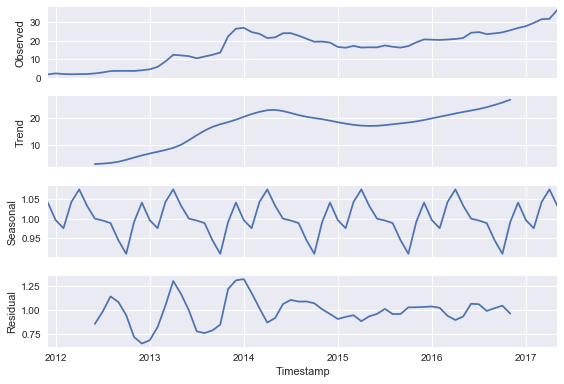

In [14]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(table_month.Weighted_Price, model="multiplicative").plot()
plt.show()

We observe that indeed, the trend is increasing over time. What we did not expect was the incredible cyclic seasonality of the trend. Hopefully we can utilize machine learning to find these seasonal trends and where they occur in order to predict them.

### Machine Learning
Looking back at our bitcoin exchanges subplots, we can clearly see that the prices aren't increasing linearly over time. The bitcoin prices can be modeled better as a polynomial function of our features. Since our hypotesis is that the price increases as a function of the time, we will have one feature, which is the time.  

#### Neural Network
This next section is only for reading, do not perform the code here until the TensorFlow section. We will use a neural network to model prices as a function of our seven features. A neural network can model can be used to model non convex functions. As you can see our prices are neither a perfect polynomial function of time nor are they a linear function, which makes a neural network a good choice for our objective. 

A neural network is composed of layers of units, each of which compute a weighted sum of incoming inputs. After applying a function to this weighted sum, known as the activation function, the unit passes its output to the outputs in the next layer. The last unit to receive the outputs of the units in the last layer returns the output. Our goal is to fine tune the weights of the network so our final output is more accurate. 

Think of a neural network as a model that learns from examples. When you initially feed data into the network, it doesn't know anything so it returns random output. Hence, we train the network after it makes a prediction. This is done by comparing the output of the network with the label or correct answer (in our case this will be the price). In order to decrease the loss of the function, we find the weights that minimize our loss. Neural networks train through backpropagation, in which the slope of the loss function with respect to the weights multiplied by the learning rate parameter is subtracted from the weights. The slope is subtracted from the weights so they can travel in the direction opposite of the increasing slope, i.e. down the slope and hopefully towards the minimum point of the funtion. 

In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# create a network with 4 layers
class NeuralNet(nn.Module):
    def __init__(self, num_features):
        super(NeuralNet, self).__init__()
        self.n1 = nn.BatchNorm1d(num_features)
        self.fc1 = nn.Linear(num_features, 64)
        self.n2 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 64)
        self.n3 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.n4 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        
    def forward(self, x):
        out = F.relu(self.fc1(self.n1(x)))
        out = F.relu(self.fc2(self.n2(out)))
        out = F.relu(self.fc3(self.n3(out)))
        out = F.relu(self.fc4(self.n4(out)))
        return out 

# Our input size is 1, since we only have one feature - the time. 
net = NeuralNet(1)

Now that we've created our neural network, we can train it on our data. We will use 20% of the data for testing, and 80% for training. 

In [5]:
# Split the data into training and test data:
table = pd.read_csv("bitcoin-historical-data/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv")
table = table.dropna()

table = table.reset_index(drop=True)
divider = np.random.rand(len(table)) < 0.8
train_table = table[divider]
test_table = table[~divider]

train_data = train_table.as_matrix().astype('float')
test_data = test_table.as_matrix().astype('float')

# Loss function:
criterion = nn.MSELoss()
# Optimizer: (either use backpropagation or a variant of it to speed learning)
optimizer = torch.optim.Adam(net.parameters(), lr=0.000889)

# epochs: how many iterations we want to train for 
num_epochs = 10
# batch size : number of examples we want to use per training update 
batch_size = 800
# number of splits: how many groups of batches we will use:
num_batches = train_data.size // batch_size
# split the data into batches 
batches =  np.array_split(train_data, num_batches)

# Train the model:
for epoch in range(num_epochs):
    for i, batch in enumerate(batches):
        # want only the year column. Convert it to pytorch's Variable 
        inputs = Variable(torch.from_numpy(np.expand_dims(batch[:,0],axis=1)).float())
        # last column - our price is the label 
        labels = Variable(torch.from_numpy(batch[:,-1]).float()) 
        
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(inputs) # get the output of the network
        
        loss = criterion(outputs, labels) # compute the loss 
        loss.backward() # update the weights of the neural network
        optimizer.step()
        
        if (i+1) % 14000 == 0: # Print out our loss
            print ('Epoch [%d/%d], Batch # [%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, loss.data[0]))


Epoch [1/10], Batch # [14000], Loss: 887.4776
Epoch [2/10], Batch # [14000], Loss: 1032.9772
Epoch [3/10], Batch # [14000], Loss: 1029.6584
Epoch [4/10], Batch # [14000], Loss: 1028.0376
Epoch [5/10], Batch # [14000], Loss: 1025.9886
Epoch [6/10], Batch # [14000], Loss: 1023.1777
Epoch [7/10], Batch # [14000], Loss: 1019.8898
Epoch [8/10], Batch # [14000], Loss: 1016.2961
Epoch [9/10], Batch # [14000], Loss: 1011.8393
Epoch [10/10], Batch # [14000], Loss: 1006.6796


### Optimal Learning Rate
Here we found that the optimal learning rate is indeed incredibly important. Since our data set is extremely large and takes a long time to calculate, manual learning rate selection worked the best for us.

```|------|------|   
| Rate | Loss |   
|------|------|    
|0.0001|118k  |    
|0.001 |837   |  
|0.01  |2358  | <- Overshot the learning rate   
|0.0009|184   |   
|------|------|   ```

Here we have found our learning rate is somewhere around 0.0009. Usually, the first generation is increasing, then a steady decrease, indicating that our learning rate is converging.


### Testing 
Now that we have trained our neural network model on the 80% of the data, we can test it with the last 20% of the data, known as the testing data. If we want a model that can make better predictions, our goal is to make a model that generalizes well instead of only learning the weights that make it perform well on the training data. 

Our neural network seems to be updating correctly, but the amount of data needed to give a reasonable convergence seems to be extremely large. Our testing in the next cell supports this.

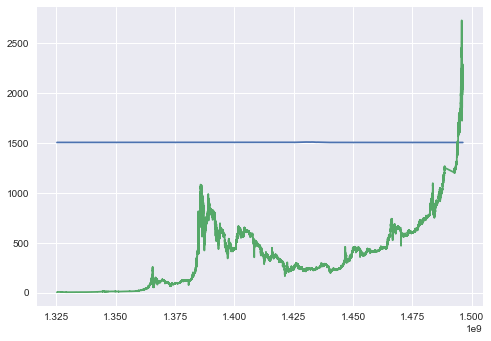

In [6]:
# test our model:
inputs = Variable(torch.from_numpy(np.expand_dims(test_data[:,0],axis=1)).float())
labels = test_data[:,-1]
# get the prediction
prediction = net(inputs)
prediction = prediction.data.numpy()
# plot our predictions
plt.plot(test_data[:,0], prediction)
plt.plot(test_data[:,0], labels)
plt.show()

### References
* https://www.coindesk.com/information/what-is-bitcoin/ 


### Conclusion
Our plot over time is not a smooth graph, it has many abrupt changes in slope. As a result of this the algorithm seems to converge at an incorrect data point. We were attempting to find a relationship between the minutes and the prices, however, our model seems to converge at a local minimum. With more generations and a well developed learning rate, it should be entirely possible to successfully predict the price fluctuations given more time. In addition, we would also like to experiment with different activation functions, numbers of layers, and units per layer to further accuratly predict prices.

### Further Reading:

* For further reading on deep learning and further applications on deep learning: https://github.com/yandexdataschool/practical_rl

* If you want to learn more about PyTorch deep learning framework:
https://github.com/yandexdataschool/practical_rl

* Here are some more concepts about Bitcoin and how to use them:
https://www.weusecoins.com/en/getting-started/

* Here is the data set used in this tutorial: 
https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima/data